In [164]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

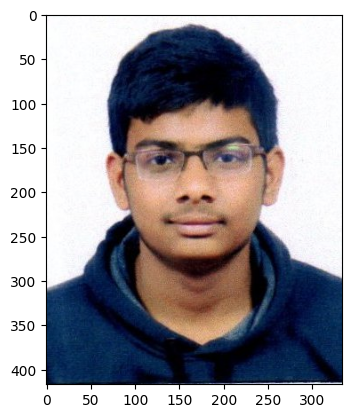

In [165]:
# reading image
bgr_img = cv.imread("images/yash.jpg")
img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
plt.imshow(img)

Question 1

In [168]:
# using inbuilt function 
height = img.shape[0]
width = img.shape[1]
scaling_f = 2.5
scaled_height = int(height*scaling_f)
scaled_width = int(width*scaling_f)
inbuilt_NNimg = cv.resize(img, (scaled_width, scaled_height), interpolation = cv.INTER_NEAREST)
plt.imshow(inbuilt_NNimg)


/tmp/ipykernel_57057/486711942.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1);plt.imshow(inbuilt_NNimg,cmap='gray');plt.title(f"Inbuilt function Image")


Text(0.5, 1.0, 'Custom function - RMSE 0.0')

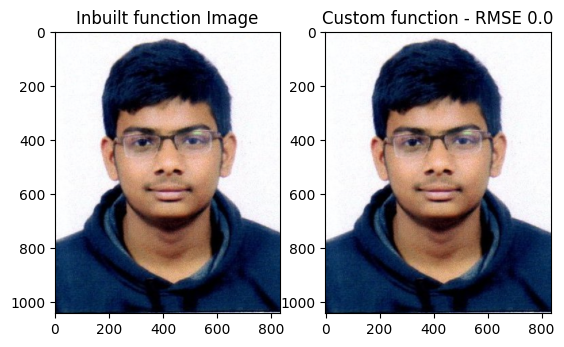

In [170]:
# custom resize function NN
def resizeNN(image, scale):
    height, width, dim = image.shape
    
    new_height = int(scale*height)
    new_width = int(scale*width)

    # 1 block in new image maps to r blocks in old image
    r = 1/scale
    
    new_image = np.zeros((new_height, new_width, dim), dtype='int32')
    
    # doing reverse mapping
        # get coordinates in current dimensions
    for x in range(new_height):
        for y in range(new_width):
            # do reverse mapping here
            # x maps to x*r and y to y*r
            original_x = int(x*r) #original_x -> x mapped in original image
            original_y = int(y*r) #original_y -> y mapped in original image
            new_image[x][y]=img[original_x][original_y]

    plt.imshow(new_image, cmap='gray')
    return new_image

customNN = resizeNN(img, 2.5)

RMSE = round(math.sqrt(np.mean((customNN-inbuilt_NNimg)**2)), 3)

plt.subplot(1, 2, 1);plt.imshow(inbuilt_NNimg,cmap='gray');plt.title(f"Inbuilt function Image")
plt.subplot(1, 2, 2);plt.imshow(customNN,cmap='gray');plt.title(f"Custom function - RMSE {RMSE}")

Q2

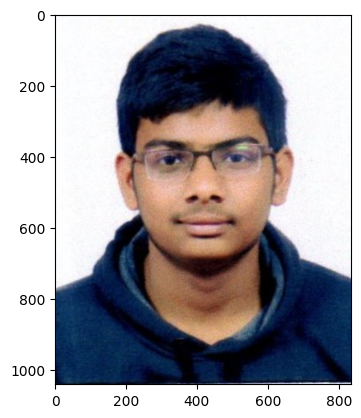

In [173]:
# using inbuilt function
# scaled_width, scaled_height - defined above
BLimg = cv.resize(img, (scaled_width, scaled_height), interpolation=cv.INTER_LINEAR)
plt.imshow(BLimg)

Text(0.5, 1.0, 'Custom func BL Image, RMSE=6.055')

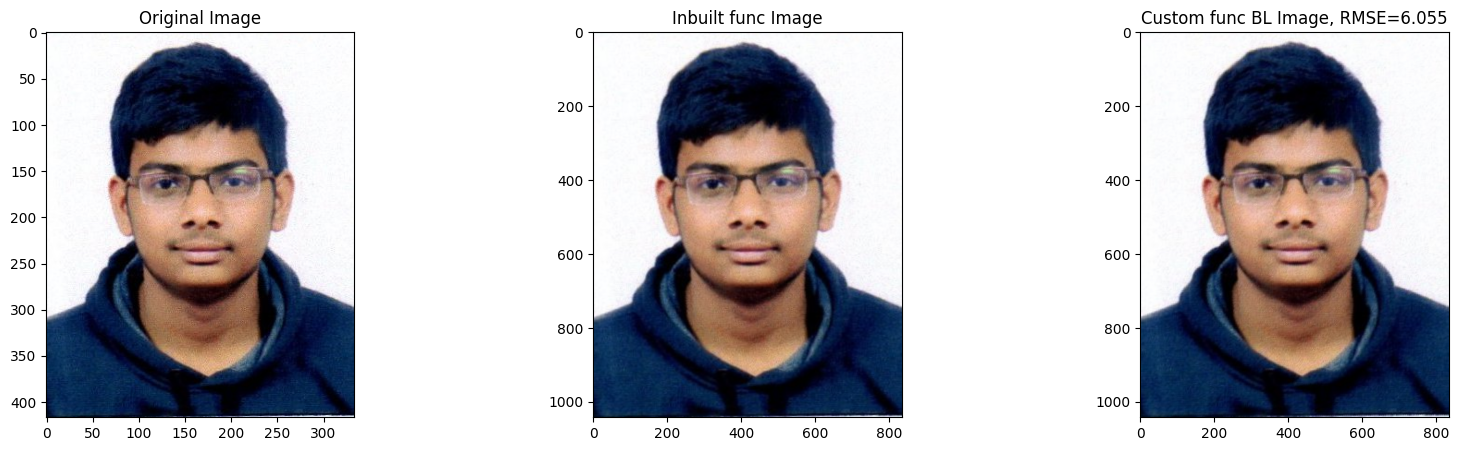

In [175]:
# using custom built function
def resizeBL(image, scale):
    height, width, dim = image.shape
    
    new_height = int(scale*height)
    new_width = int(scale*width)

    # 1 block in new image maps to r blocks in old image
    r = 1/scale
    
    new_image = np.zeros((new_height, new_width, dim), dtype='int32')\

    for x in range(new_height):
        original_x = int(x*r) #original_x -> x mapped in original image
        x1 = original_x+1
        x1 = min(x1, height-1)
        diff_in_x = x*r - original_x
        
        for y in range(new_width):
            # do reverse mapping here
            # x maps to x*r and y to y*r
            original_y = int(y*r) #original_y -> y mapped in original image
            y1 = original_y+1
            
            # check if the values go beyond the feasible index
            y1 = min(y1, width-1)
            diff_in_y = y*r - original_y

            top_left = image[original_x][original_y]
            top_right = image[x1][original_y]
            bottom_left = image[original_x][y1]
            bottom_right = image[x1][y1]

            # calculating all the factors that we need to multiply with
            f1 = (1-diff_in_x)*(1-diff_in_y)
            f2 =(1-diff_in_y)*(diff_in_x) 
            f3 = (1-diff_in_x)*(diff_in_y)
            f4 = (diff_in_y)*(diff_in_x)

            new_image[x][y]= top_right*f1 + top_right*f2+ f3*bottom_left + f4*bottom_right

    # plt.imshow(new_image)
    return new_image

customBL = resizeBL(img, 2.5)

RMSE = round(math.sqrt(np.mean((customBL-BLimg)**2)), 3)

plt.figure(figsize=[20,5])
plt.subplot(1, 3, 1);plt.imshow(img);plt.title(f"Original Image")
plt.subplot(1, 3, 2);plt.imshow(BLimg);plt.title(f"Inbuilt func Image")
plt.subplot(1, 3, 3);plt.imshow(customBL);plt.title(f"Custom func BL Image, RMSE={RMSE}")



Question 3

334 417
167 208


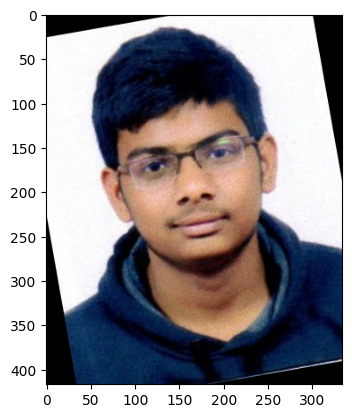

In [176]:
# inbuilt rotate function
height = img.shape[0]
width =img.shape[1]
centerX, centerY = width//2, height//2
print(width, height)
print(centerX, centerY)
M = cv.getRotationMatrix2D((centerX, centerY), 10, 1)
inbuilt_rotatedImg = cv.warpAffine(img, M, (width, height))
plt.imshow(inbuilt_rotatedImg)

In [177]:
# custom rotation function
def rotate(img, angle):

    # converting angle to radians
    angle = ((math.pi)*angle)/180
    
    # black image
    rImg = np.zeros(img.shape, dtype='int32')

    cosine = math.cos(angle)
    sine = math.sin(angle)
    height, width = img.shape[:2]
    cX, cY = width//2, height//2

    # iteratate over the entire image
    for x in range(height):
        for y in range(width):
            # reverse mapping the image coordinates by applying inverse of the transform
            new_y = int((x-cX)*sine + (y-cY)*cosine + cY)
            new_x = int((x-cX)*cosine - (y-cY)*sine + cX)
            # for coordinates that are going out of bounds
            if (new_y<0) or (new_y>=width):
                new_y = 0
            if (new_x<0) or (new_x>=height):
                new_x = 0
            rImg[x][y] = img[new_x][new_y]

    return rImg

custom_rotated = rotate(img, -10)

RMSE = round(math.sqrt(np.mean((custom_rotated-inbuilt_rotatedImg)**2)), 3)

plt.figure(figsize=[20,5])
plt.subplot(1, 3, 1);plt.imshow(img,cmap='gray');plt.title(f"Original Image")
plt.subplot(1, 3, 2);plt.imshow(inbuilt_rotatedImg,cmap='gray');plt.title(f"Inbuilt func Img")
plt.subplot(1, 3, 3);plt.imshow(custom_rotated,cmap='gray');plt.title(f"Custom func Img RMSE {RMSE}")

Text(0.5, 1.0, 'Custom func Img RMSE 73.837')

Question 4

In [192]:
# convert to gray
gimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# making a copy of bitplane image
bitplane_image = gimg.copy()

bitPlaneRMSE = np.array([]) # empty array

# calculating RMSE for each bit plane
for i in range(0, 8):
    squareArr = np.array((gimg - (bitplane_image&(2**i)))**2)
    squareSum = np.sum(squareArr)/np.size(squareArr)
    bitPlaneRMSE = np.append(bitPlaneRMSE, round(math.sqrt(squareSum), 3))

# performing subplot to display every bit plane sliced image
plt.figure(figsize=[10,10])
plt.subplot(3, 3, 1);plt.imshow(bitplane_image&(2**0),cmap='gray');plt.title(f"RMSE {bitPlaneRMSE[0]}")
plt.subplot(3, 3, 2);plt.imshow(bitplane_image&(2**1),cmap='gray');plt.title(f"RMSE {bitPlaneRMSE[1]}")
plt.subplot(3, 3, 3);plt.imshow(bitplane_image&(2**2),cmap='gray');plt.title(f"RMSE {bitPlaneRMSE[2]}")
plt.subplot(3, 3, 4);plt.imshow(bitplane_image&(2**3),cmap='gray');plt.title(f"RMSE {bitPlaneRMSE[3]}")
plt.subplot(3, 3, 5);plt.imshow(bitplane_image&(2**4),cmap='gray');plt.title(f"RMSE {bitPlaneRMSE[4]}")
plt.subplot(3, 3, 6);plt.imshow(bitplane_image&(2**5),cmap='gray');plt.title(f"RMSE {bitPlaneRMSE[5]}")
plt.subplot(3, 3, 7);plt.imshow(bitplane_image&(2**6),cmap='gray');plt.title(f"RMSE {bitPlaneRMSE[6]}")
plt.subplot(3, 3, 8);plt.imshow(bitplane_image&(2**7),cmap='gray');plt.title(f"RMSE {bitPlaneRMSE[7]}")
plt.subplot(3, 3 ,9);plt.imshow(gimg,cmap='gray');plt.title("Original Image")


Text(0.5, 1.0, 'Original Image')

Question 5

In [179]:
# using inbuilt function

# loading the image and converting it to rgb for showing correctly
bgr_img = cv.imread('images/New_Zealand_Boat.jpg')
hisImg = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
b,g,r = cv.split(bgr_img)

eq_b = cv.equalizeHist(b)
eq_g = cv.equalizeHist(g)
eq_r = cv.equalizeHist(r)

inbuilt_eq_color = cv.merge((eq_r, eq_g, eq_b))

In [180]:
# custom histogram function
def histeq(img):

    height, width = img.shape[:2]

    equalized_image = np.zeros(img.shape, dtype='int32')
    
    # getting frequency of each pixel
    freq = np.zeros((256), dtype='int32')

    for pixel in np.nditer(img):
        freq[pixel] = freq[pixel]+1
    
    # finding pdf
    total_pixels = np.sum(freq)
    freq = freq/total_pixels

    # finding cdf
    for i in range(1,256):
        freq[i]=freq[i]+freq[i-1]
    
    # cdf*255
    freq = freq*255
    freq = np.rint(freq)
    freq = np.int32(freq)

    for x in range(height):
        for y in range(width):
            equalized_image[x][y] = freq[img[x][y]]

    return equalized_image


b, g, r = cv.split(bgr_img)

eq_r = histeq(r)
eq_g = histeq(g)
eq_b = histeq(b)

eq_img = cv.merge((eq_r, eq_g, eq_b))

RMSE = round(math.sqrt(np.mean((eq_img-inbuilt_eq_color)**2)), 3)

plt.figure(figsize=[20,5])
plt.subplot(1, 3, 1);plt.imshow(hisImg);plt.title(f"Original Image")
plt.subplot(1, 3, 2);plt.imshow(eq_img);plt.title(f"Equalized inbuilt func Image")
plt.subplot(1, 3, 3);plt.imshow(inbuilt_eq_color);plt.title(f"Equalized custom func Image,  RMSE= {RMSE}")

Text(0.5, 1.0, 'Equalized custom func Image,  RMSE= 2.069')

Question 6

Text(0.5, 1.0, 'Original Image')

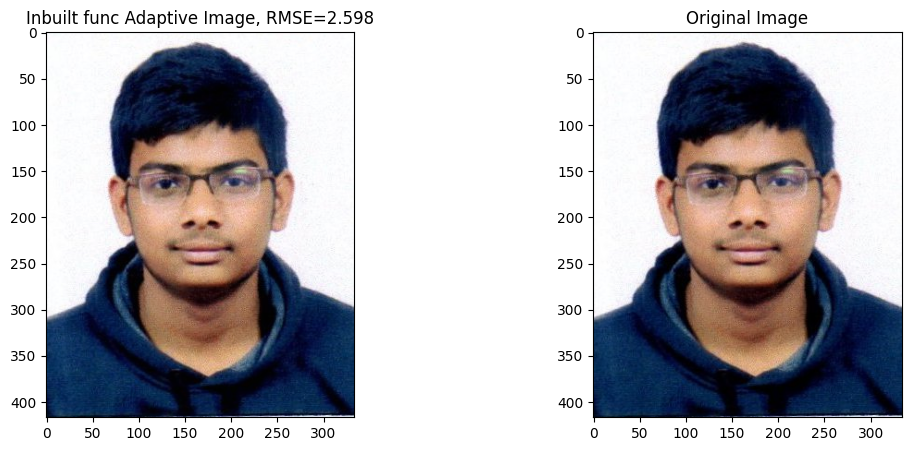

In [181]:
# using inbuilt function

bgr_img = cv.imread('images/yash.jpg')
img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
# plt.imshow(img, cmap='gray')

b,g,r = cv.split(bgr_img)

# creating clahe instance 
clahe = cv.createCLAHE(clipLimit=10000000000, tileGridSize=(8,8))
inbuilt_adaphist_b = clahe.apply(b)
inbuilt_adaphist_g = clahe.apply(g)
inbuilt_adaphist_r = clahe.apply(r)
inbuilt_adaphist = cv.merge((inbuilt_adaphist_r, inbuilt_adaphist_g, inbuilt_adaphist_b))


RMSE = round(math.sqrt(np.mean((inbuilt_adaphist-img)**2)), 3)

plt.figure(figsize=[20,5])
plt.subplot(1, 3, 1);plt.imshow(inbuilt_adaphist);plt.title(f"Inbuilt func Adaptive Image, RMSE={RMSE}")
plt.subplot(1, 3, 2);plt.imshow(img);plt.title(f"Original Image")

Text(0.5, 1.0, 'Custom func Image, RMSE = 97.582')

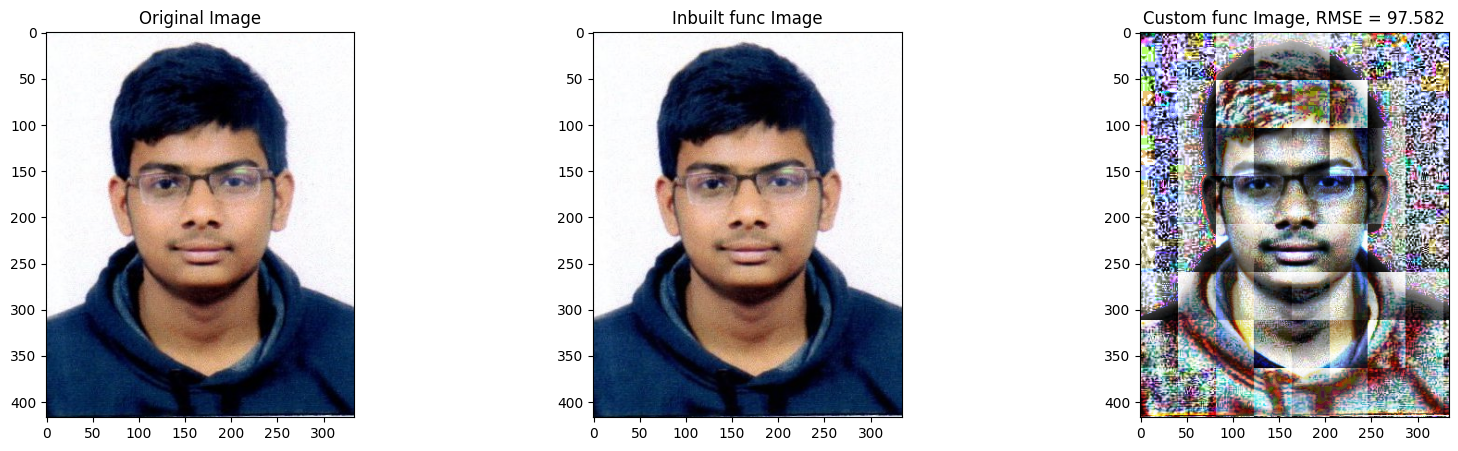

In [182]:
#custom adaptive histogram function
def histAdaptive(img, tilesize):
    # getting the tile-size
    height, width = img.shape[:2]
    row_factor = tilesize[0]
    col_factor = tilesize[1]

    # rows -> by which I need to make a jump to next tile
    # cols -> by which I need to make a jump to next tile
    rows = height//row_factor
    cols = width//col_factor

    # getting all the small groups of tiles 
    group_tiles = [img[x:x+rows,y:y+cols] for x in range(0,img.shape[0],rows) for y in range(0,img.shape[1],cols)]
    
    # empty array to store all those equalized tiles
    tiles2 = []

    for tile in group_tiles:
        result_tile = histeq(tile)
        tiles2.append(result_tile)
    
    # creating empty arrays
    hori = []
    verti = []
    
    # totalnumber of horizontal and vertical tiles
    horizontal_tiles = math.ceil(width/cols)
    vertical_tiles = math.ceil(height/rows)
    
    # concatinating all images in horizontal direction
    for x in range(0,vertical_tiles):
        hori.append(cv.hconcat(tiles2[x*horizontal_tiles:x*horizontal_tiles+horizontal_tiles]))

    # concatinating horizontally stitched images in vertical direction to get the final output image
    final_img = cv.vconcat(hori)
    return final_img
    
bgr_img = cv.imread("images/yash.jpg")
original_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)

b,g,r = cv.split(bgr_img)
equ_b = histAdaptive(b, (8,8))
equ_g = histAdaptive(g, (8, 8))
equ_r = histAdaptive(r, (8, 8))

custom_adaptive = cv.merge((equ_r, equ_g, equ_b))

RMSE = round(math.sqrt(np.mean((inbuilt_adaphist-custom_adaptive)**2)), 3)

plt.figure(figsize=[20,5])
plt.subplot(1,3,1);plt.imshow(original_img);plt.title("Original Image")
plt.subplot(1,3,2);plt.imshow(inbuilt_adaphist);plt.title(f"Inbuilt func Image")
plt.subplot(1,3,3);plt.imshow(custom_adaptive);plt.title(f"Custom func Image, RMSE = {RMSE}")


Question 7

In [13]:
! pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable


In [143]:
from skimage import exposure
from skimage.exposure import match_histograms

In [183]:
# using inbuilt function 
bgr_img = cv.imread('images/New_Zealand_Boat.jpg')
rgb_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
reference_img = cv.imread('images/reference.jpg')
inbuilt_matched = match_histograms(rgb_img, reference_img, multichannel=True)

/tmp/ipykernel_57057/1672871057.py:5: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  inbuilt_matched = match_histograms(rgb_img, reference_img, multichannel=True)


In [184]:
# using custom matching function 
bgr_img = cv.imread('images/New_Zealand_Boat.jpg')
rgb_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
reference_img = cv.imread('images/reference.jpg')

def match_histogram(img, reference):
    height, width = img.shape[:2]
    reference_height, reference_width = reference[:2]

    matched_image = np.zeros(img.shape, dtype='int32')
    
    # getting frequency of each pixel
    freq = np.zeros((256), dtype='int32')
    freq_ref = np.zeros((256), dtype='int32')

    # freq of pixels in original image
    for pixel in np.nditer(img):
        freq[pixel] = freq[pixel]+1

    # freq of pixels in ref image
    for pixel in np.nditer(reference):
        freq_ref[pixel] = freq_ref[pixel]+1
    
    # finding pdf of original image
    total_pixels = np.sum(freq)
    freq = freq/total_pixels

    # finding pdf of ref image
    total_pixels_ref = np.sum(freq_ref)
    freq_ref = freq_ref/total_pixels_ref

    # finding cdf of original image
    for i in range(1,256):
        freq[i]=freq[i]+freq[i-1]

    # finding cdf of ref image
    for i in range(1,256):
        freq_ref[i]=freq_ref[i]+freq_ref[i-1]
    
    # cdf(freq)*255 -> for original image
    freq = freq*255
    freq = np.rint(freq)
    freq = np.int32(freq)
    
    # cdf(freq_ref)*255 -> for reference image
    freq_ref = freq_ref*255
    freq_ref = np.rint(freq_ref)
    freq_ref = np.int32(freq_ref)

    # doing inverse transform on the freq array using the freq array of the reference image
    for i in range(freq.size):
        fi = freq[i]
        for index in range(freq_ref.size):
            if(freq_ref[index]==fi):
                freq[i]=index
                break

    for x in range(height):
        for y in range(width):
            matched_image[x][y] = freq[img[x][y]]

    return matched_image

r_i, g_i, b_i = cv.split(rgb_img)
b_r, g_r, r_r = cv.split(reference_img)

b_m, g_m, r_m = match_histogram(b_i, b_r), match_histogram(g_i, g_r), match_histogram(r_i, r_r)
custom_matched = cv.merge((r_m, g_m, b_m))


Text(0.5, 1.0, 'Inbuilt Matched')

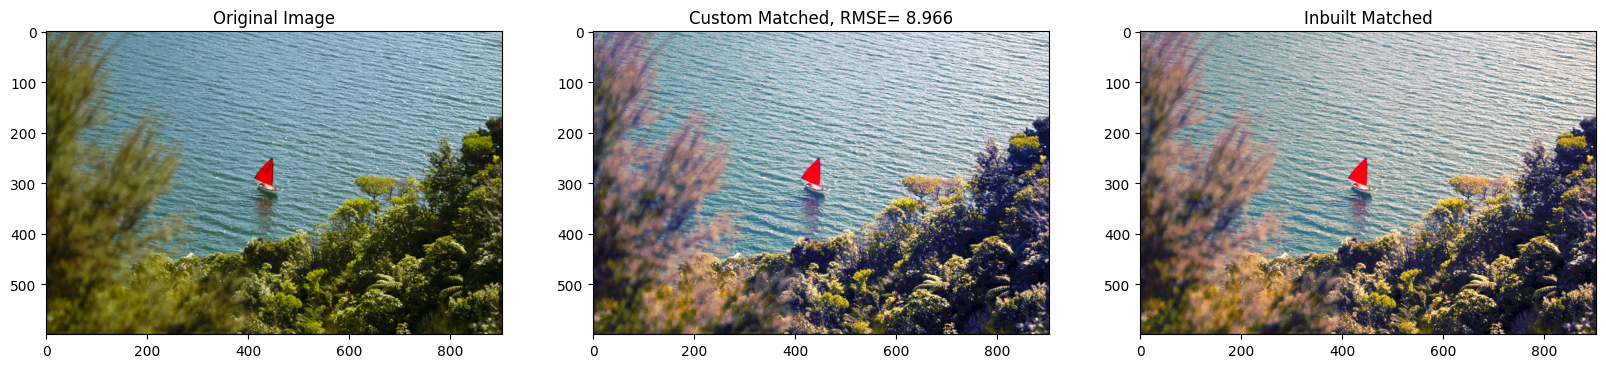

In [185]:

RMSE = round(math.sqrt(np.mean((custom_matched-inbuilt_matched)**2)), 3)


plt.figure(figsize=[20,5])
plt.subplot(1, 3, 1);plt.imshow(rgb_img);plt.title(f"Original Image")
plt.subplot(1, 3, 2);plt.imshow(custom_matched);plt.title(f"Custom Matched, RMSE= {RMSE}")
plt.subplot(1, 3, 3);plt.imshow(inbuilt_matched);plt.title(f"Inbuilt Matched")

Question 8

In [186]:
bgr_img = cv.imread('images/yash.jpg')
img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
rows, cols = img.shape[:2]

input_pts = np.float32([[25,25],
            [300, 400],
            [25,400]])

output_pts = np.float32([
            [25,25],
            [300,400],
            [50,350]
])

M = cv.getAffineTransform(input_pts, output_pts)
inbuilt_affined = cv.warpAffine(img, M, (cols, rows))
plt.imshow(inbuilt_affined)

Text(0.5, 1.0, 'Inbuilt Affined')

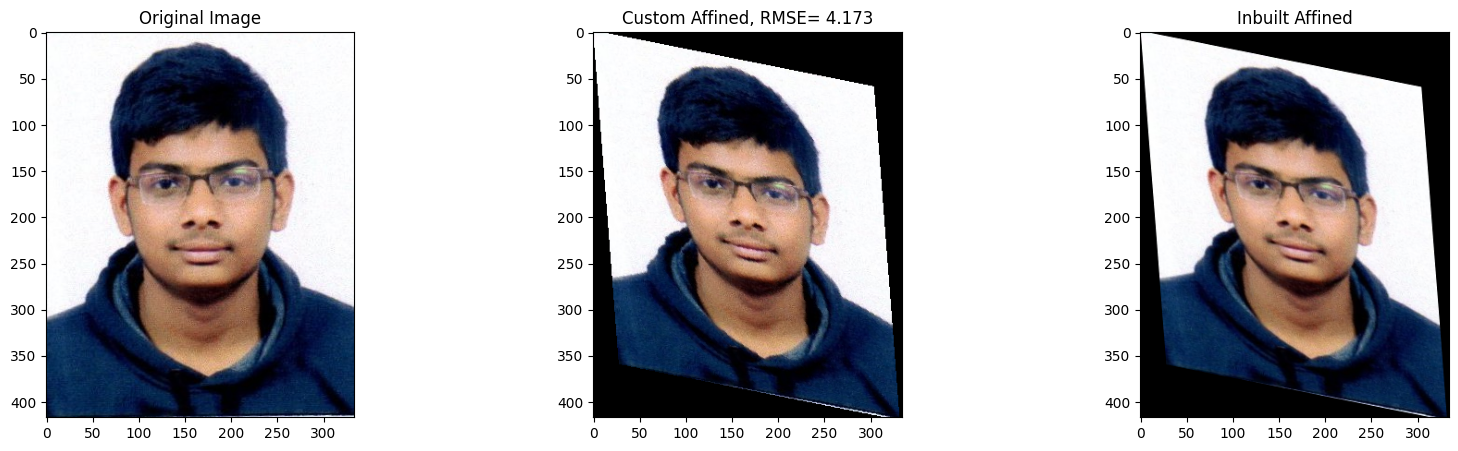

In [187]:
# custom built function for affine transform
def affine(img, src_pts, dst_pts):
    affined = np.zeros_like(img)

    height, width = img.shape[:2]

    point_M = np.zeros((6, 6))

    output_M = np.zeros((6), dtype='int32')
    # print(output_M)
    for i in range(3):
        x = src_pts[i][0]
        y = src_pts[i][1]
        point_M[i*2] = [x,y,1,0,0,0]
        point_M[i*2 +1 ] = [0,0,0,x,y,1]

    for i in range(3):
        x,y = dst_pts[i]
        output_M[i*2] = x
        output_M[i*2+1] = y
    
    # Getting the coefficients c1,c2,c3,c4... 
    coeff = np.linalg.solve(point_M, output_M)

    # Once we have the coefficients, we will now make transformation matrix 
    trans_M = np.array([
        [coeff[0], coeff[1], coeff[2]],
        [coeff[3], coeff[4], coeff[5]],
        [0, 0, 1]
    ])
    # print(height, width)
    # since calculating inverse of the transformation matrix is difficult, we can simply iterate over the image and keep doing products and set them to the new image coordinates
    for x in range(height):
        for y in range(width):
            ny,nx,nz = np.dot(trans_M, [y,x,1])

            if (nx>0) and (nx<height) and (ny>0) and (ny<width):
                affined[int(nx)][int(ny)] = img[x][y]
                # print(int(nx),int(ny))

    # plt.imshow(affined)
    return affined


custom_affined = affine(img, input_pts, output_pts)

RMSE = round(math.sqrt(np.mean((custom_affined-inbuilt_affined)**2)), 3)

plt.figure(figsize=[20,5])
plt.subplot(1, 3, 1);plt.imshow(img);plt.title(f"Original Image")
plt.subplot(1, 3, 2);plt.imshow(custom_affined);plt.title(f"Custom Affined, RMSE= {RMSE}")
plt.subplot(1, 3, 3);plt.imshow(inbuilt_affined);plt.title(f"Inbuilt Affined")
